Importing the dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 #integral for image processing
from google.colab.patches import cv2_imshow #to display an image
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) #training a nn, there are several values that are randomly generated, random seed setting main changes won't be there
from tensorflow import keras
from keras.datasets import mnist #digits classification
from tensorflow.math import confusion_matrix

loading the MNIST data (image data from keras.datasets)

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train) #it is numpy n dimensional array

numpy.ndarray

In [ ]:
print(X_train.shape) #60000 images, 28x28 dimension, grayscale because 3 nahi likha
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


grayscale images have only 1 color channel

In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


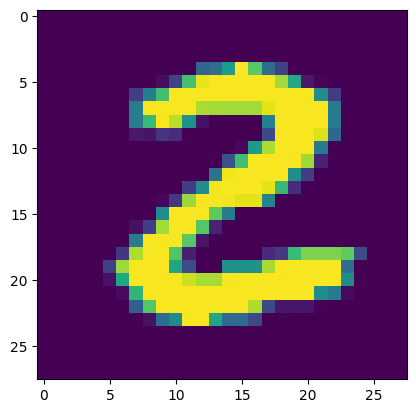

2


In [ ]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#print the corresp label
print(Y_train[25])

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values i.e. the number of labels that we have

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

One hot encoding: label is zero, 1st value will be 1 and then next 9 values will be 0
[1 0 0 0 0 0 0 0] jaisa

In [ ]:
#scaling the values (normalization)

X_train = X_train/255
X_test = X_test/255

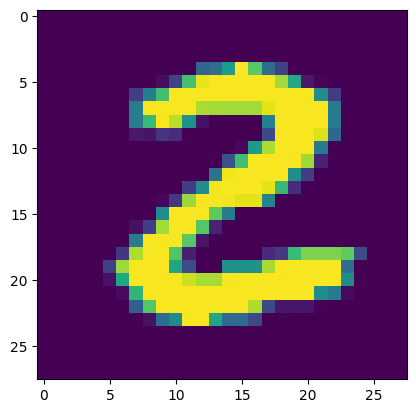

In [ ]:
plt.imshow(X_train[25])

Building the NN

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
#compiling the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#training the neural network

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1028 - accuracy: 0.9685
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0541 - accuracy: 0.9824
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.037

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0966 - accuracy: 0.9749
0.9749000072479248
0.096601702272892


In [ ]:
print(X_test.shape)

(10000, 28, 28)


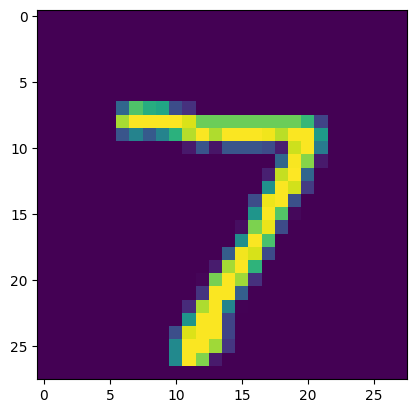

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[8.1856834e-04 4.8691132e-03 8.2703686e-01 8.7805170e-01 3.5713555e-08
 2.9477911e-05 1.6397388e-12 9.9999911e-01 1.5238902e-01 1.8328272e-01]


In [ ]:
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

CONFUSION MATRIX

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 975    0    0    0    0    2    0    1    2    0]
 [   0 1121    5    2    0    1    2    1    3    0]
 [   2    0 1008    3    0    0    2    7   10    0]
 [   0    0    7  979    0   10    0    7    7    0]
 [   1    0    3    1  953    4    5    1    1   13]
 [   3    0    0   10    2  863    4    2    6    2]
 [   5    2    2    0    3    4  938    1    3    0]
 [   1    5   10    4    1    1    0  998    4    4]
 [   5    0    4    7    3    6    1    2  940    6]
 [   3    2    0    4   10    4    0    6    5  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

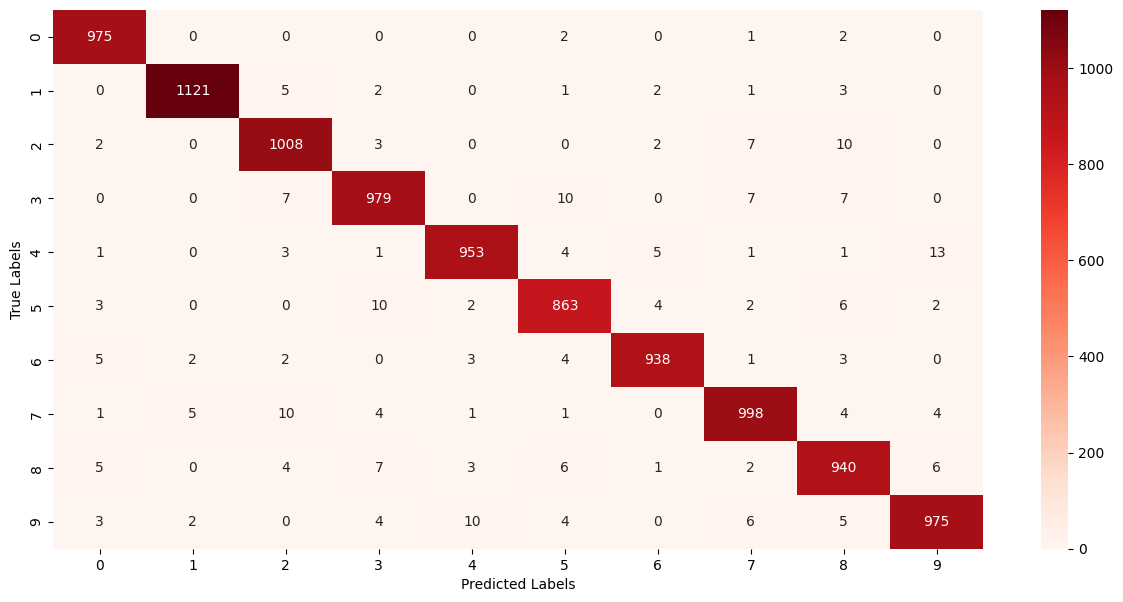

In [ ]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path = '/content/1.webp'

In [ ]:
input_image = cv2.imread(input_image_path) #can copy and paste the path also

In [ ]:
type(input_image) #now the image has been converted to numpy array

numpy.ndarray

In [ ]:
print(input_image.shape)

(210, 374, 3)


In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


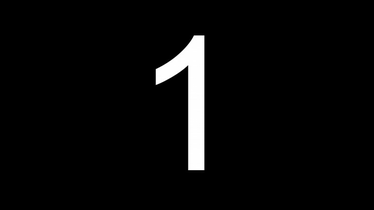

In [ ]:
cv2_imshow(input_image)

Convert RGB to Grayscale

In [ ]:
#to convert the image to a grayscale image because 3 channels

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
print(grayscale.shape)

(210, 374)


to change the dimensions

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
print(input_image_resize.shape) #because compatible with the neural network

(28, 28)


In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
print(input_image_resize)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 254   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 254   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 253 254   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 228 254 254   

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28]) #to tell the ml model that I need prediction for only one label

In [ ]:
print(image_reshaped.shape)

(1, 28, 28)


In [ ]:
input_pred = model.predict(image_reshaped)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(input_pred)

[[0.00150964 0.9993663  0.17711073 0.00250152 0.03263332 0.03075694
  0.00413961 0.8509389  0.11493328 0.45193607]]


In [ ]:
input_pred_label = np.argmax(input_pred)

In [ ]:
print(input_pred_label)

1
